# Diabetes Analysis

### Author: Ly Duc Trung

### Link: https://github.com/DucTrung1802/DS/blob/main/GLM_Report/diabetes_analysis.ipynb

### Dataset Link: https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 0. Install and import libraries

### Check R version

In [1]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "4"

$minor
[1] "1.2"

$year
[1] "2021"

$month
[1] "11"

$day
[1] "01"

$`svn rev`
[1] "81115"

$language
[1] "R"

$version.string
[1] "R version 4.1.2 (2021-11-01)"

$nickname
[1] "Bird Hippie"

### 0.1. Install

In [2]:
# INSTALL THESE PACKAGES IN CONDA TERMINAL
# conda install r-corrplot
# conda install r-rcompanion
# conda install r-dplyr

### 0.2. Import

In [3]:
library(corrplot)
library(rcompanion)
library(pcaPP)

Warning message:
"package 'corrplot' was built under R version 4.1.3"
corrplot 0.92 loaded

Warning message:
"package 'rcompanion' was built under R version 4.1.3"
Warning message:
"package 'pcaPP' was built under R version 4.1.3"


## 1. Import Data

In [4]:
input_data = read.csv("diabetes_full_data.csv")

In [5]:
df = data.frame(input_data)

In [6]:
df

X,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,...,0,5,30,30,1,0,9,5,1,1


## 2. Data Preprocessing

### 2.0. Standardize column names

In [7]:
colnames(df)
# Column "X" should be changed to be a more meaningful name.

[1] "X"                    "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

In [8]:
colnames(df)[1] = "Index"

In [9]:
colnames(df)

[1] "Index"                "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

### 2.1. Mismatched data types

In [10]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

In [11]:
# All columns have correct data type

### 2.2. Mixed data values

In [12]:
# Example: (female, woman, man, male) => (male, female)

In [13]:
# This dataset contains only number data => No mixed data values

### 2.3. Missing data

#### 2.3.1 Null data

In [14]:
sum(is.na(df))

[1] 0

In [15]:
# This dataset has no missing values

#### 2.3.2 Missing data in specific columns

In [16]:
# We see that in column "Age", the value could have value of 14 
# which is Don’t know / Refused / Missing (_AGEG5YR - BRFSS)

In [17]:
nrow(subset(df, Age == 14))

[1] 0

In [18]:
# Conclusion: The dataset has no missing data.

In [19]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

## 3. Exploratory data analysis (EDA)

### 3.1. Response variable analysis

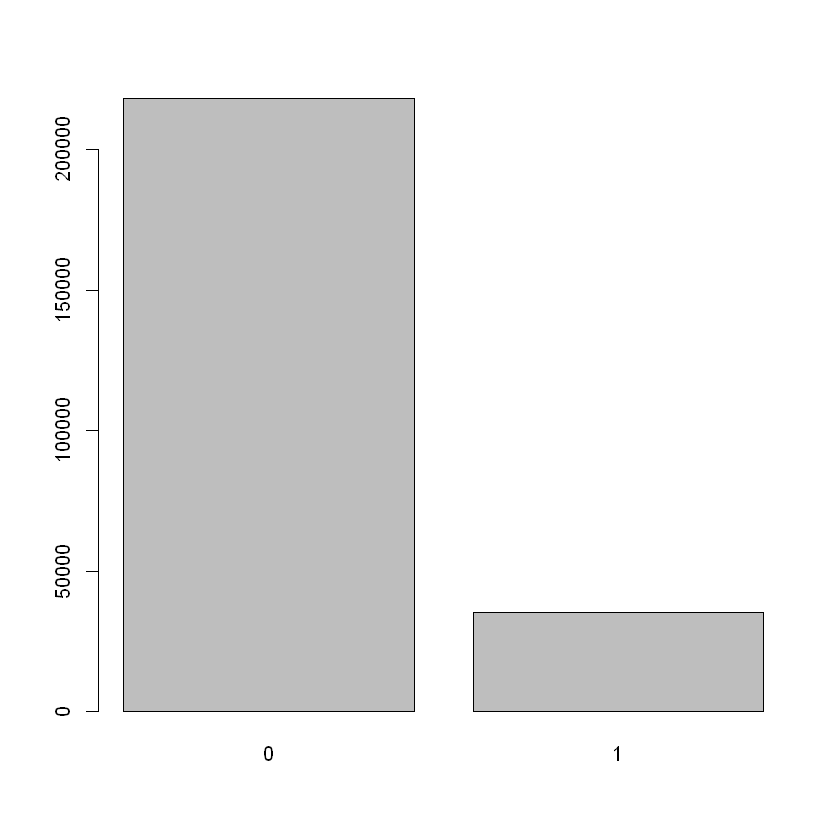

In [20]:
barplot(table(df$Diabetes_binary))

### 3.2. Numeric variables analysis

In [21]:
# Numeric variables (3): BMI, MentHlth, PhysHlth

#### 3.2.1. Overview

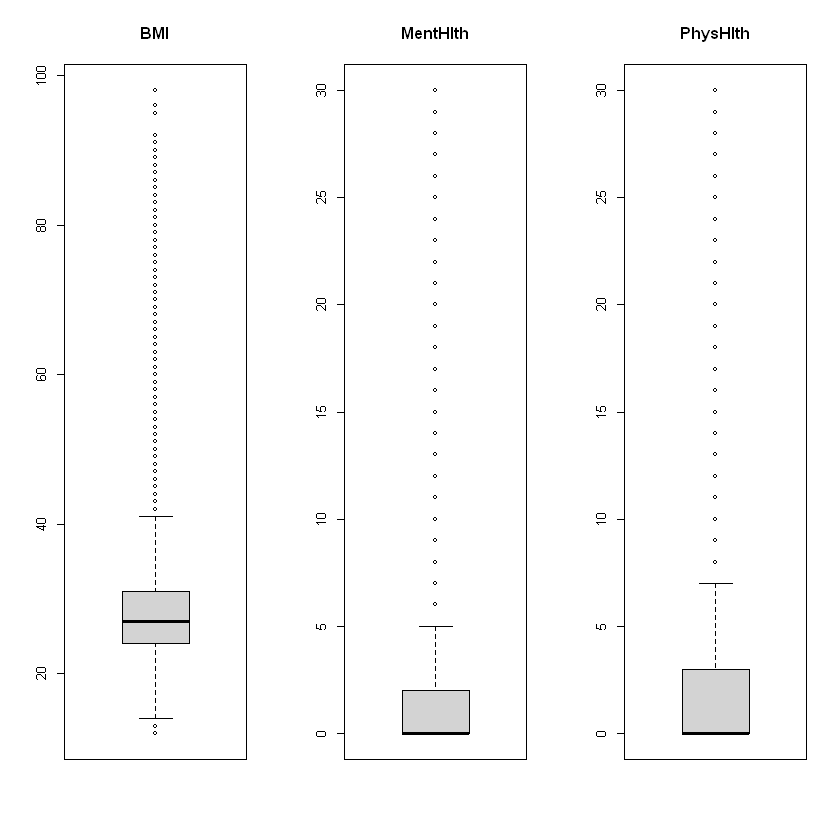

In [22]:
par(mfrow=c(1,3))
boxplot(df$BMI, main="BMI")
boxplot(df$MentHlth, main="MentHlth")
boxplot(df$PhysHlth, main="PhysHlth")

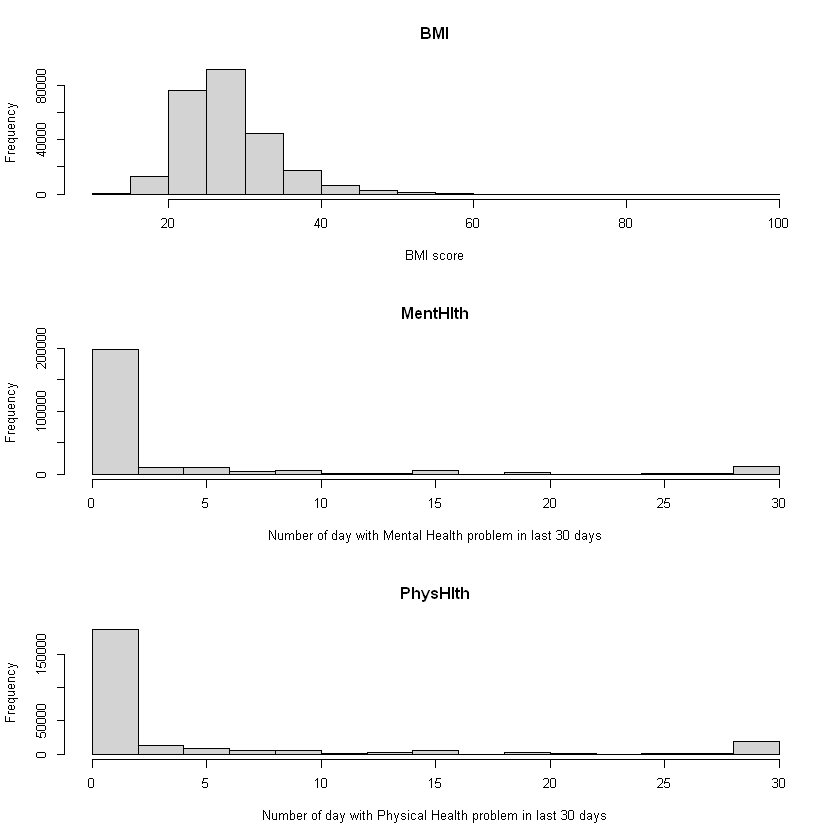

In [23]:
par(mfrow=c(3,1))
hist(df$BMI, main="BMI", xlab="BMI score")
hist(df$MentHlth, main="MentHlth", xlab="Number of day with Mental Health problem in last 30 days")
hist(df$PhysHlth, main="PhysHlth", xlab="Number of day with Physical Health problem in last 30 days")

#### 3.2.1. BMI

In [24]:
summary(df$BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   24.00   27.00   28.38   31.00   98.00 

In [25]:
# We see maximum value of BMI is 98 which is abnormal.

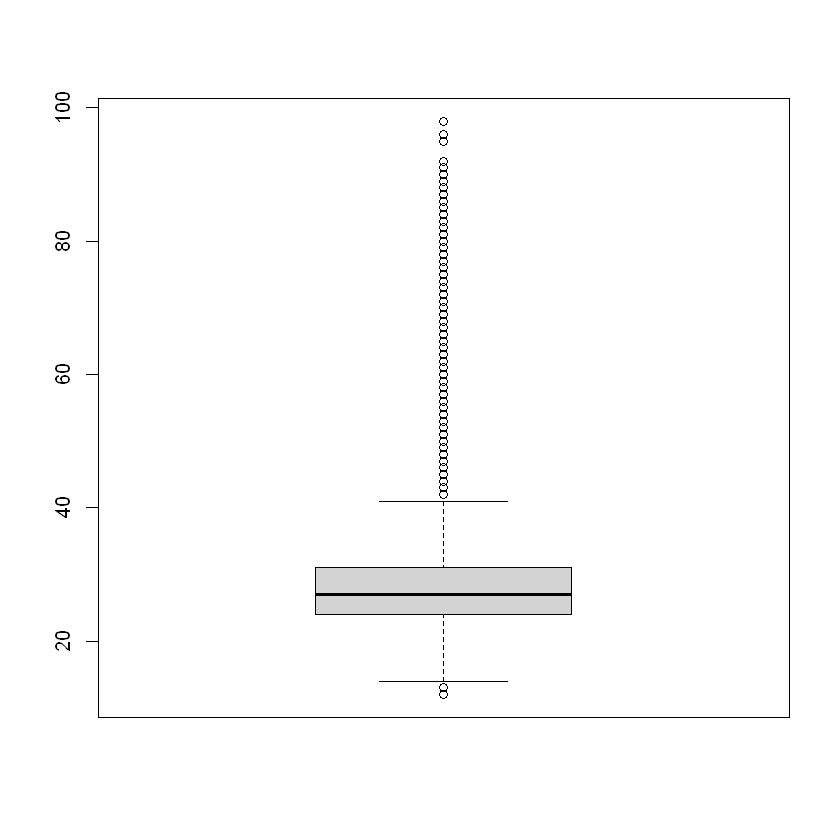

In [26]:
# Boxplot data
boxplot(df$BMI)

In [27]:
# We see that dataset has several outliers in "BMI" column.

In [28]:
BMI_q1 = quantile(df$BMI, 0.25)
BMI_q3 = quantile(df$BMI, 0.75)
BMI_iqr = BMI_q3 - BMI_q1
BMI_lower_bound = BMI_q1 - 1.5 * BMI_iqr
BMI_upper_bound = BMI_q3 + 1.5 * BMI_iqr

In [29]:
BMI_outlier_df = df[df$BMI < BMI_lower_bound | df$BMI > BMI_upper_bound, ]

In [30]:
nrow(BMI_outlier_df) / nrow(df) * 100

[1] 3.881662

In [31]:
# We see that the percentage of outliers is approximately about 4%.
# Extreme values of BMI that higher 40 could affect the model.

# To standardize the BMI index, WHO recommendations is used.
# Reference: https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations

# |   BMI     | Nutritional Status | Categorical |
# |-----------|--------------------|-------------|
# | < 18.5    | Underweight        |      1      |
# | 18.5–24.9 | Normal weight      |      2      |
# | 25.0–29.9 | Pre-obesity        |      3      |
# | 30.0–34.9 | Obesity class I    |      4      |
# | 35.0–39.9 | Obesity class II   |      5      |
# | > 40      | Obesity class III  |      6      |

new_column = rep(0, nrow(df))
BMI_index = which(colnames(df) == "BMI")
df_std_1 = cbind(df[,1:BMI_index], StdBMI = new_column, df[,(BMI_index + 1):ncol(df)])

In [32]:
df_std_1

Index,HighBP,HighChol,CholCheck,BMI,StdBMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,0,1,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,0,1,0,0,1,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,0,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,0,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,0,1,0,0,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,0,1,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,0,1,0,0,1,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,0,1,0,1,0,...,0,5,30,30,1,0,9,5,1,1


In [33]:
df_std_1[df_std_1$BMI < 18.5, ]$StdBMI = 1
df_std_1[df_std_1$BMI >= 18.5 & df_std_1$BMI < 25, ]$StdBMI = 2
df_std_1[df_std_1$BMI >= 25 & df_std_1$BMI < 30, ]$StdBMI = 3
df_std_1[df_std_1$BMI >= 30 & df_std_1$BMI < 35, ]$StdBMI = 4
df_std_1[df_std_1$BMI >= 35 & df_std_1$BMI < 40, ]$StdBMI = 5
df_std_1[df_std_1$BMI >= 40, ]$StdBMI = 6

In [34]:
df_std_1

Index,HighBP,HighChol,CholCheck,BMI,StdBMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,6,1,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,3,1,0,0,1,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,3,0,0,0,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,3,0,0,0,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,2,0,0,0,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,3,1,0,0,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,4,1,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,3,1,0,0,1,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,4,1,0,1,0,...,0,5,30,30,1,0,9,5,1,1


In [35]:
table(df_std_1$StdBMI)


    1     2     3     4     5     6 
 3127 68953 93749 53451 20663 13737 

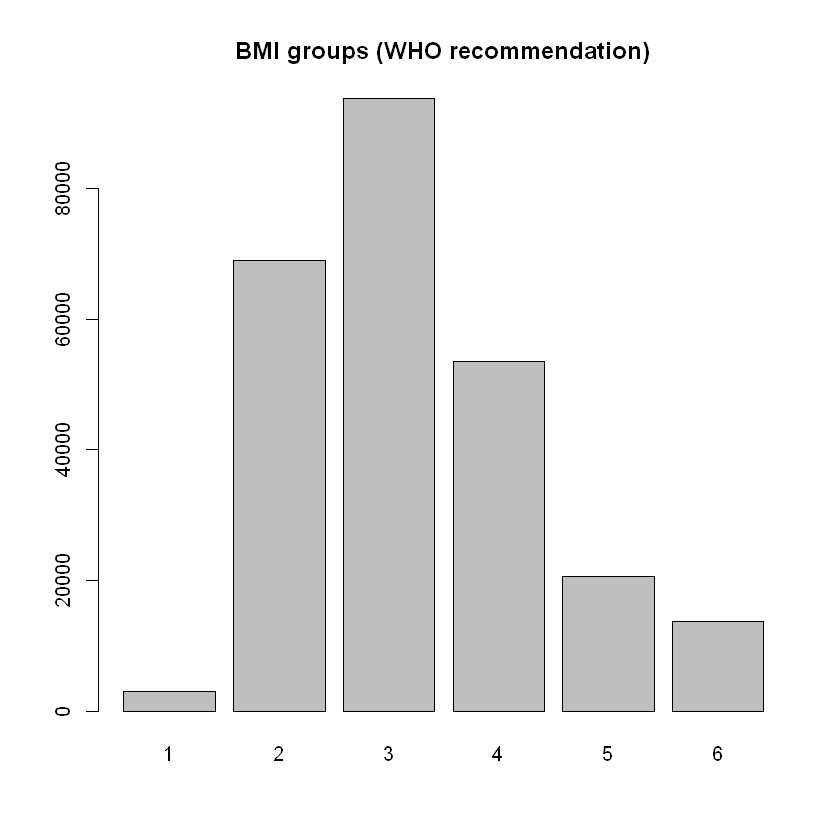

In [36]:
barplot(table(df_std_1$StdBMI), main="BMI groups (WHO recommendation)")

In [37]:
str(df_std_1)

'data.frame':	253680 obs. of  24 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : num  6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : 

In [38]:
# Comment: StdBMI data are categorical.

In [39]:
# We now must validate the meaningful of this standardizatiton with response variable.

In [40]:
table(df_std_1$StdBMI, df_std_1$Diabetes_binary)

   
        0     1
  1  2958   169
  2 65025  3928
  3 83057 10692
  4 43170 10281
  5 14994  5669
  6  9130  4607

In [41]:
chisq.test(table(df_std_1$StdBMI, df_std_1$Diabetes_binary))


	Pearson's Chi-squared test

data:  table(df_std_1$StdBMI, df_std_1$Diabetes_binary)
X-squared = 13387, df = 5, p-value < 2.2e-16


In [42]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BMI groups.

#### BMI output: df_std_1

In [43]:
str(df_std_1)

'data.frame':	253680 obs. of  24 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : num  6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : 

#### 3.2.2. MentHlth

In [44]:
summary(df_std_1$MentHlth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.185   2.000  30.000 

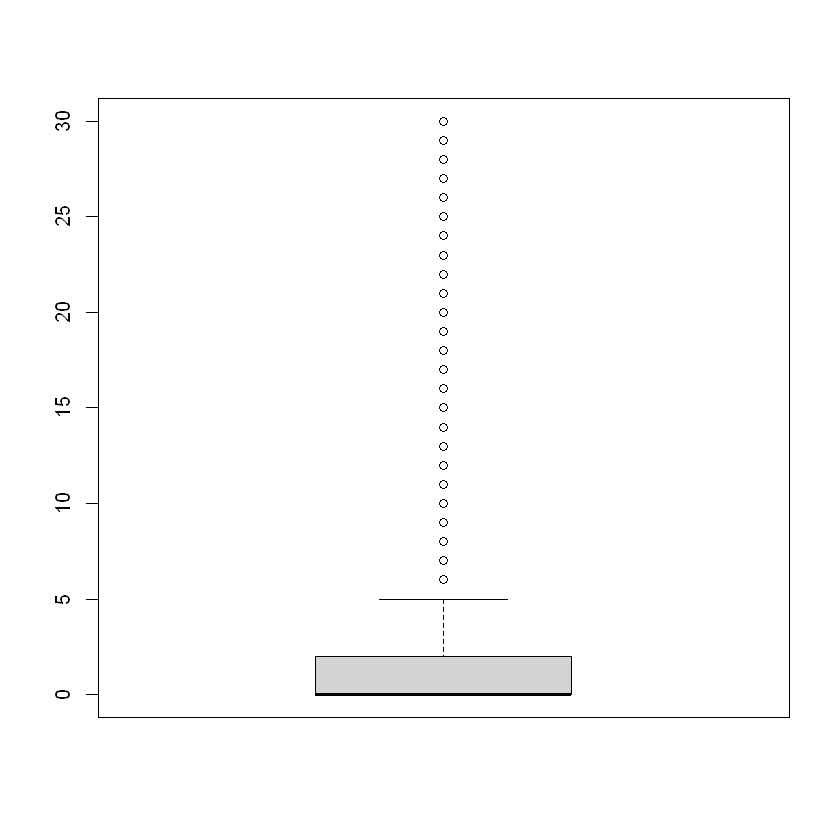

In [45]:
boxplot(df_std_1$MentHlth)

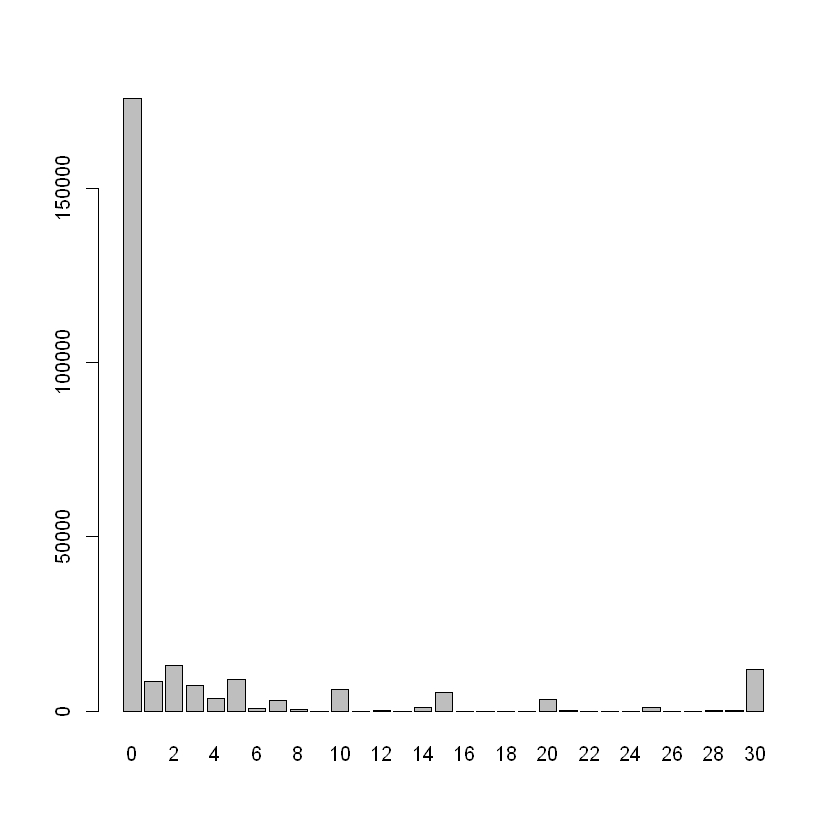

In [46]:
barplot(table(df_std_1$MentHlth))

In [47]:
# We see data with value ZERO is overwhelmed compared to other values.
# Create a binary feature indicates that whether a person has mental health problem.

In [48]:
new_column = rep(0, nrow(df_std_1))
MentHlth_index = which(colnames(df_std_1) == "MentHlth")
df_std_2 = cbind(df_std_1[,1:MentHlth_index], BoolMentHlth = new_column, df_std_1[,(MentHlth_index+1):ncol(df_std_1)])

In [49]:
df_std_2[df_std_2$MentHlth > 0, ]$BoolMentHlth = 1

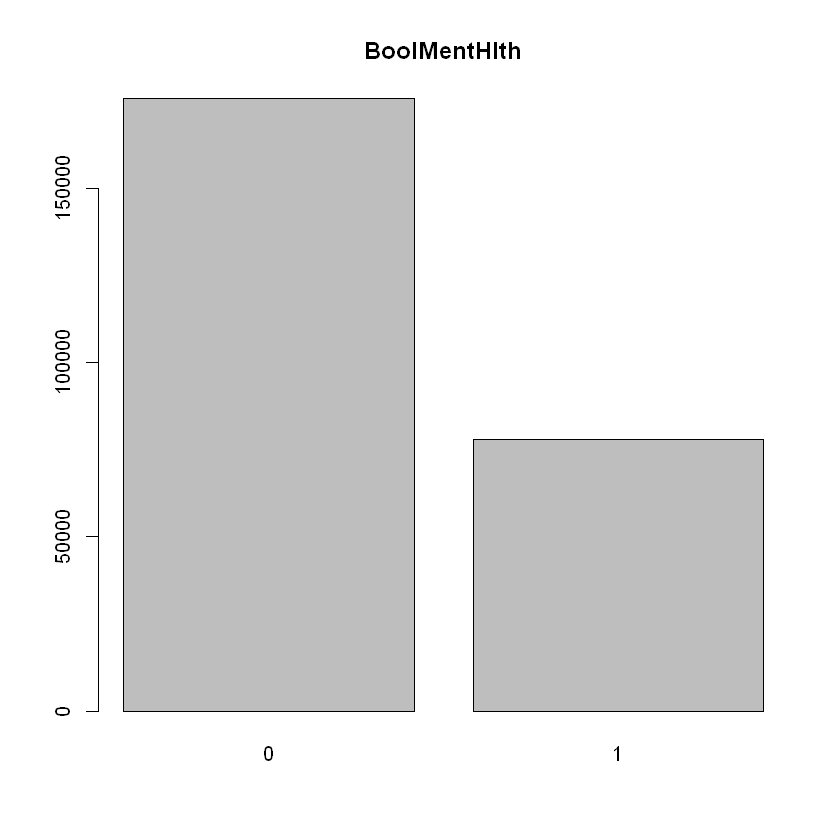

In [50]:
barplot(table(df_std_2$BoolMentHlth), main="BoolMentHlth")

In [51]:
chisq.test(table(df_std_2$BoolMentHlth, df_std_2$Diabetes_binary))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(df_std_2$BoolMentHlth, df_std_2$Diabetes_binary)
X-squared = 178.24, df = 1, p-value < 2.2e-16


In [52]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BoolMentHlth groups.

#### MentHlth output: df_std_2

In [53]:
str(df_std_2)

'data.frame':	253680 obs. of  25 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : num  6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ BoolMentHlth        : 

#### 3.2.3. PhysHlth

In [54]:
summary(df_std_2$PhysHlth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   4.242   3.000  30.000 

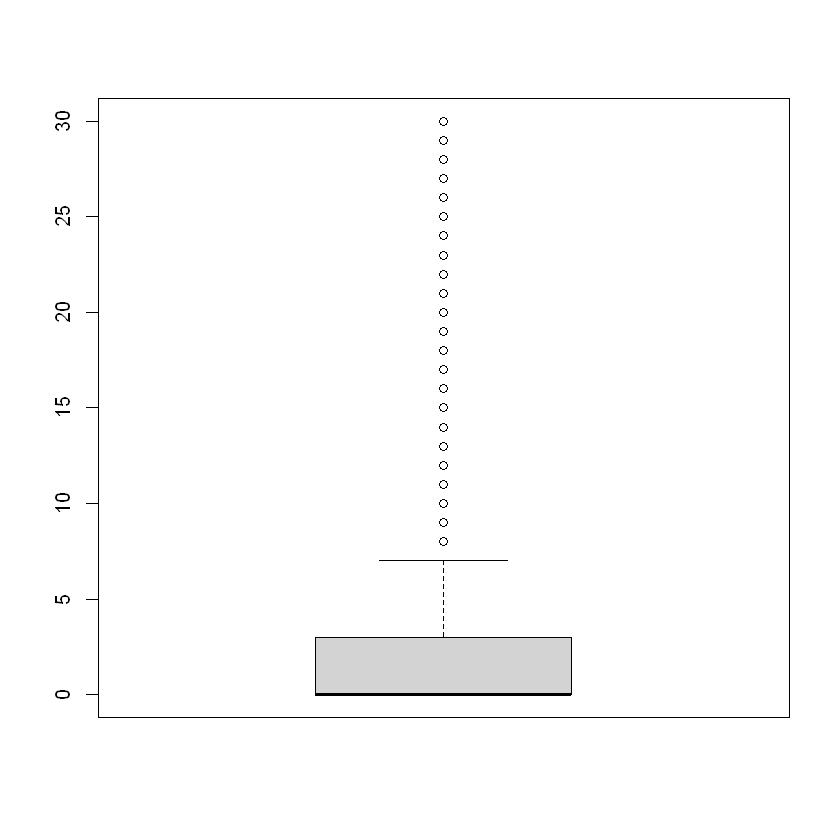

In [55]:
boxplot(df_std_1$PhysHlth)

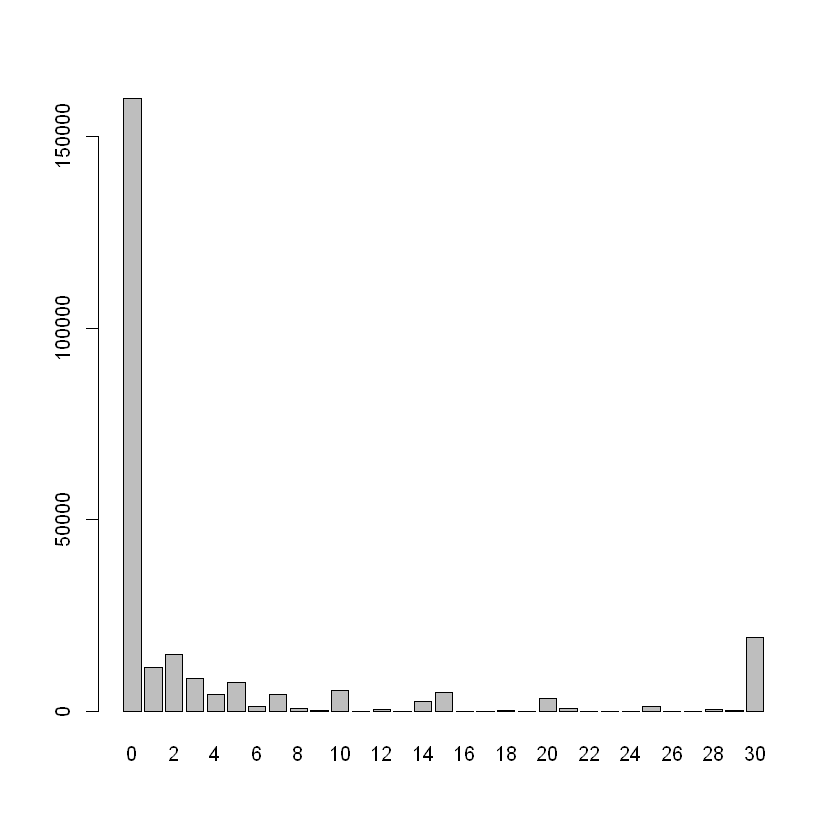

In [56]:
barplot(table(df_std_2$PhysHlth))

In [57]:
# We see data with value ZERO is overwhelmed compared to other values.
# Create a binary feature indicates that whether a person has physical health problem.

In [58]:
new_column = rep(0, nrow(df_std_2))
PhysHlth_index = which(colnames(df_std_2) == "PhysHlth")
df_std_3 = cbind(df_std_2[,1:PhysHlth_index], BoolPhysHlth = new_column, df_std_2[,(PhysHlth_index+1):ncol(df_std_2)])

In [59]:
df_std_3[df_std_3$PhysHlth > 0, ]$BoolPhysHlth = 1

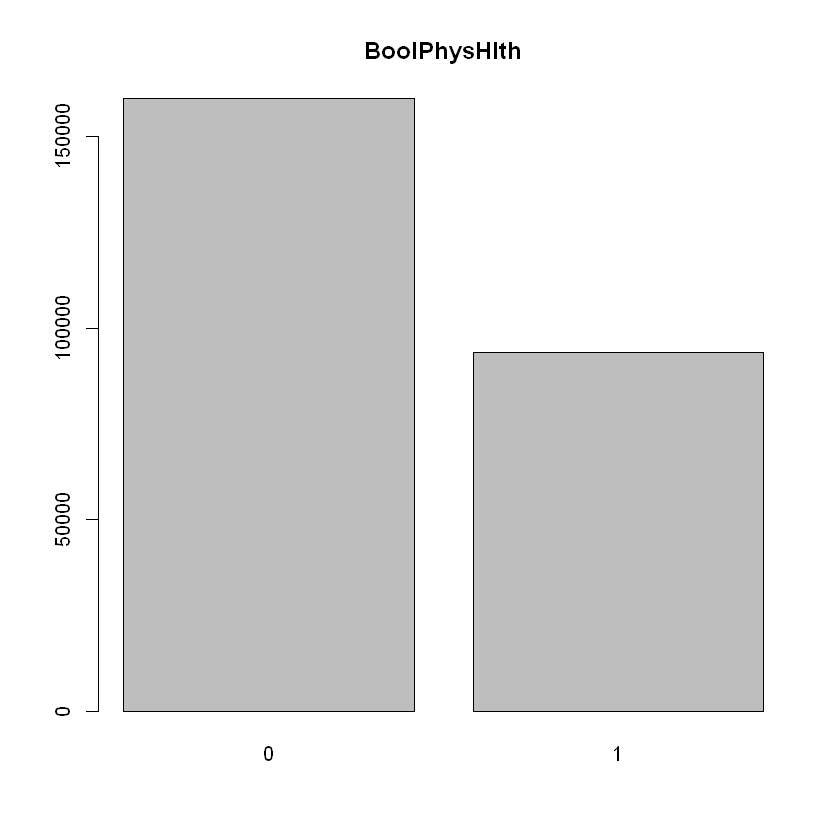

In [60]:
barplot(table(df_std_3$BoolPhysHlth), main="BoolPhysHlth")

In [61]:
chisq.test(table(df_std_3$BoolPhysHlth, df_std_3$Diabetes_binary))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(df_std_3$BoolPhysHlth, df_std_3$Diabetes_binary)
X-squared = 4364, df = 1, p-value < 2.2e-16


In [62]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BoolPhysHlth groups.

#### PhysHlth output: df_std_3

In [63]:
str(df_std_3)

'data.frame':	253680 obs. of  26 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : num  6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ BoolMentHlth        : 

### 3.3. Categorical variables analysis (except "StdBMI", "BoolMentHlth", "BoolPhysHlth")

In [64]:
# Categorical variables (18): HighBP, HighChol, CholCheck, Smoker, Stroke,
# HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump,
# AnyHealthcare, NoDocbcCost, GenHlth, DiffWalk, Sex, Age, Education, Income.

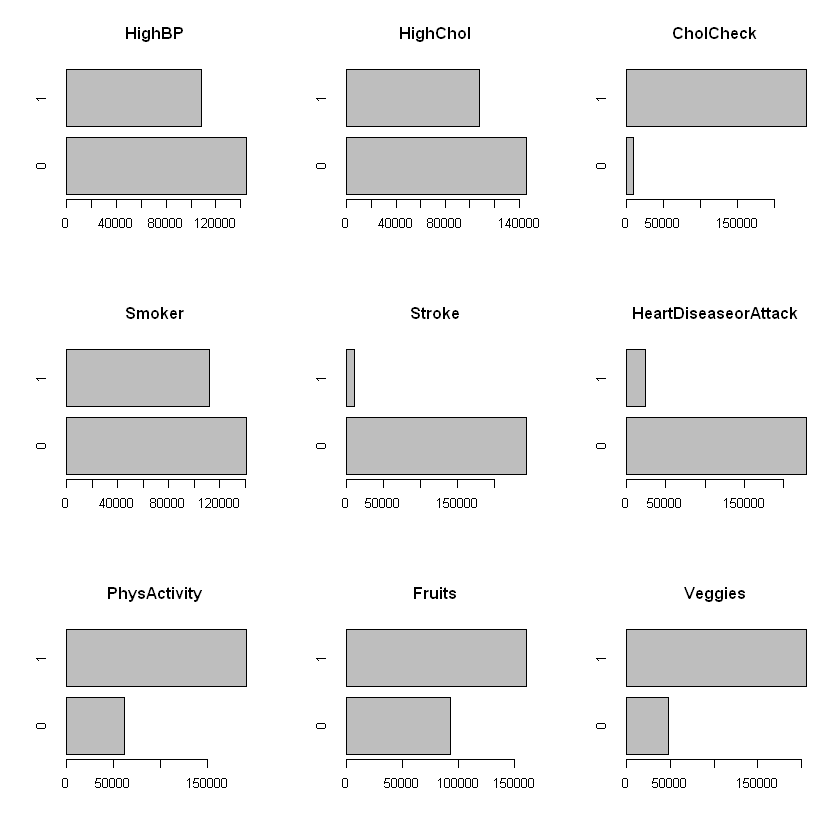

In [65]:
# Plot first 9 categorical variables: 
# HighBP, HighChol, CholCheck, Smoker, Stroke,
# HeartDiseaseorAttack, PhysActivity, Fruits, Veggies,
par(mfrow=c(3,3))
barplot(table(df$HighBP), horiz=T, main="HighBP")
barplot(table(df$HighChol), horiz=T, main="HighChol")
barplot(table(df$CholCheck), horiz=T, main="CholCheck")
barplot(table(df$Smoker), horiz=T, main="Smoker")
barplot(table(df$Stroke), horiz=T, main="Stroke")
barplot(table(df$HeartDiseaseorAttack), horiz=T, main="HeartDiseaseorAttack")
barplot(table(df$PhysActivity), horiz=T, main="PhysActivity")
barplot(table(df$Fruits), horiz=T, main="Fruits")
barplot(table(df$Veggies), horiz=T, main="Veggies")

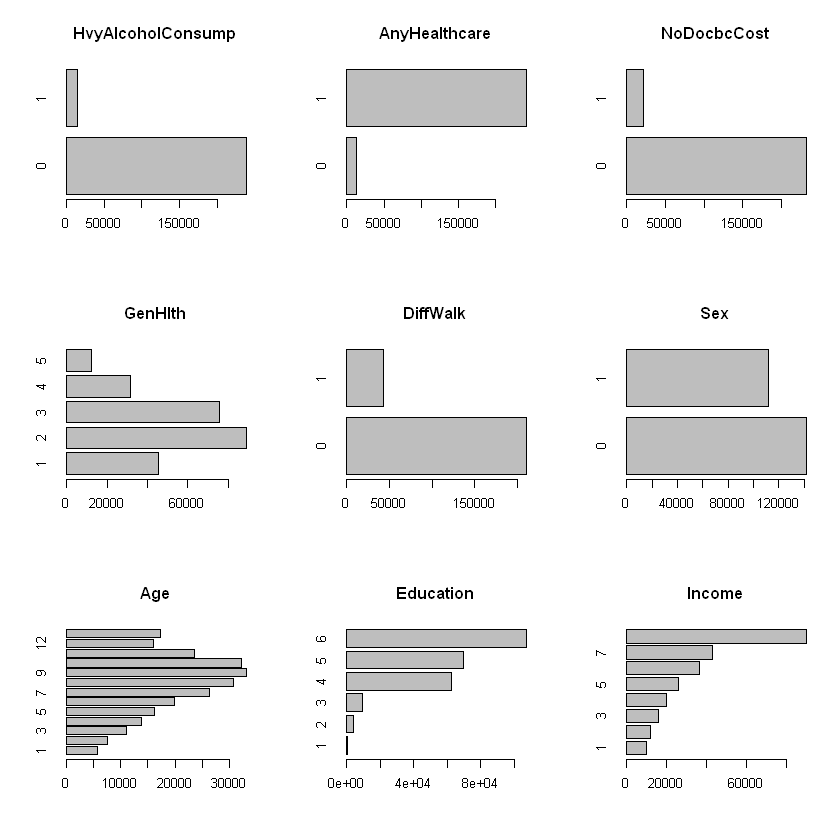

In [66]:
# Plot last 9 categorical variables
# HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, 
# DiffWalk, Sex, Age, Education, Income.
par(mfrow=c(3,3))
barplot(table(df$HvyAlcoholConsump), horiz=T, main="HvyAlcoholConsump")
barplot(table(df$AnyHealthcare), horiz=T, main="AnyHealthcare")
barplot(table(df$NoDocbcCost), horiz=T, main="NoDocbcCost")
barplot(table(df$GenHlth), horiz=T, main="GenHlth")
barplot(table(df$DiffWalk), horiz=T, main="DiffWalk")
barplot(table(df$Sex), horiz=T, main="Sex")
barplot(table(df$Age), horiz=T, main="Age")
barplot(table(df$Education), horiz=T, main="Education")
barplot(table(df$Income), horiz=T, main="Income")

### 3.4. Correlation analysis

In [67]:
numeric_col = c("BMI", "MentHlth", "PhysHlth")

In [68]:
length(numeric_col)

[1] 3

In [69]:
binary_col = c("HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
               "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
               "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
              "BoolMentHlth", "BoolPhysHlth", "DiffWalk", "Sex", "Diabetes_binary")

In [70]:
length(binary_col)

[1] 17

In [71]:
ordinal_col = c("StdBMI", "GenHlth", "Age", "Education", "Income")

In [72]:
length(ordinal_col)

[1] 5

#### 3.4.1. Numeric variable analysis

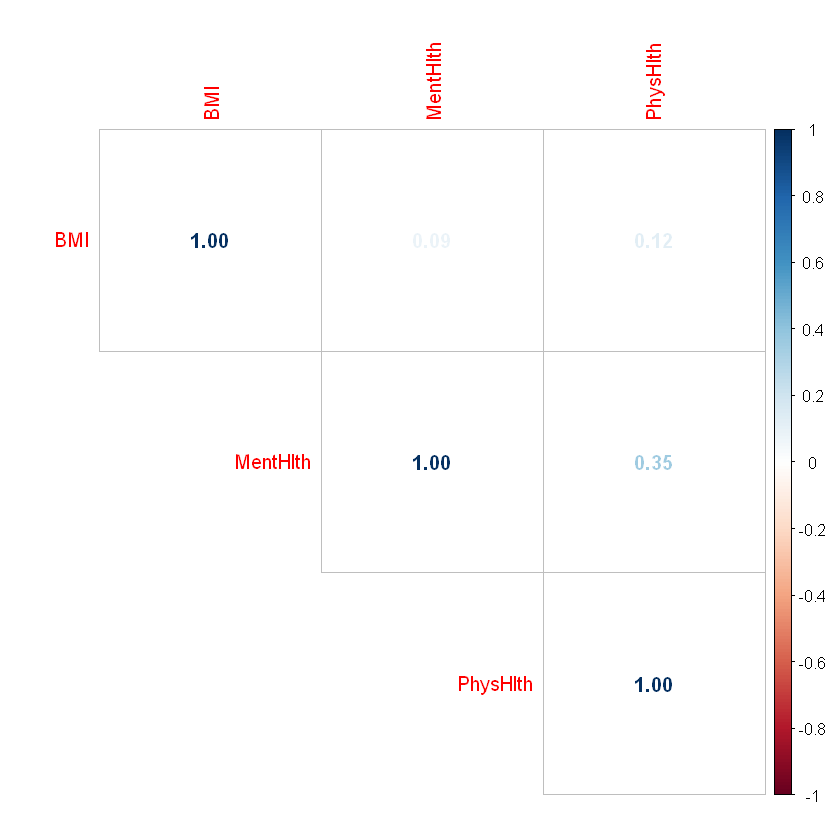

In [73]:
corrplot(cor(df[,numeric_col]), method="number", type="upper")

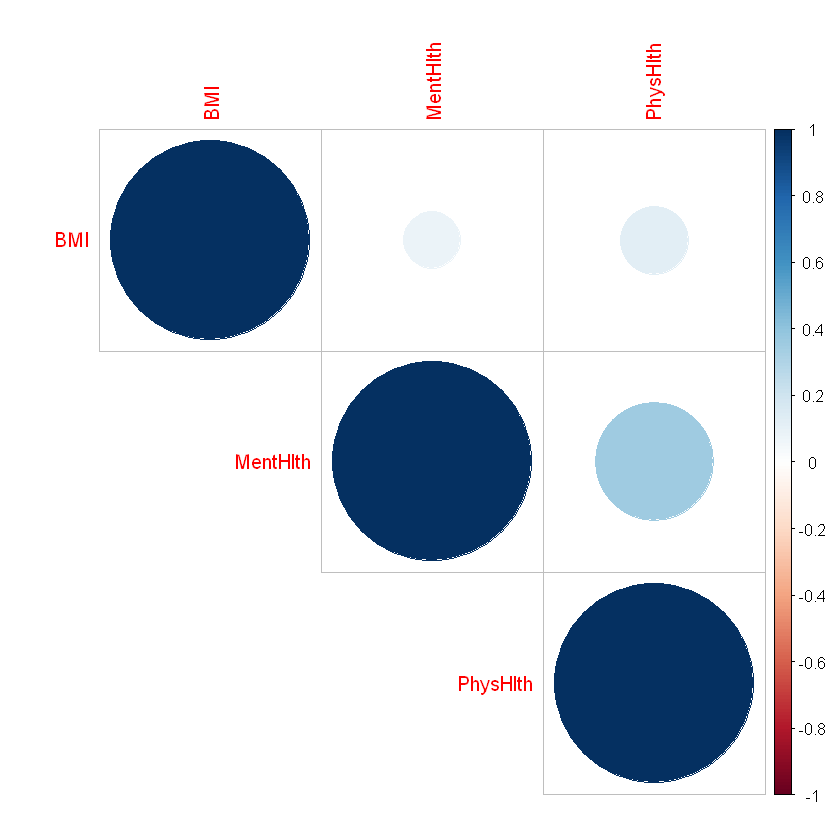

In [74]:
corrplot(cor(df[,numeric_col]), method="circle", type="upper")

In [75]:
# Comment: We see no multicollinearity here.

#### 3.4.2. Design correlation matrix

In [76]:
# One hot encoder all categorical columns before next step.

In [84]:
get_correlation = function(dataframe, col_1, col_2, numeric_col, binary_col, ordinal_col)
{
    if (col_1 %in% ordinal_col || col_2 %in% ordinal_col)
    {
        return (cor.fk(dataframe[,col_1], dataframe[,col_2]))
    }
    else if (col_1 %in% numeric_col && col_2 %in% binary_col ||
             col_1 %in% binary_col && col_2 %in% numeric_col)
    {
        return (cor.test(dataframe[,col_1], dataframe[,col_2])$estimate)
    }
    else if (col_1 %in% binary_col && col_2 %in% binary_col)
    {
        return (cramerV(as.matrix(dataframe[ ,c(col_1, col_2)])))
    }
    else if (col_1 %in% numeric_col && col_2 %in% numeric_col)
    {
        return (cor(dataframe[,col_1], dataframe[,col_2]))
    }
    else
    {
        return (100)
    }
}    

In [85]:
get_correlation(df_std_3, "HighBP", "Diabetes_binary", numeric_col, binary_col, ordinal_col)

HighBP,Diabetes_binary
1,0
0,0
1,0
1,0
1,0
1,0
1,0
1,0
1,1
0,0


In [172]:
all_colnames = colnames(df_std_3)

In [173]:
correlation_matrix = matrix(0, nrow = length(all_colnames), ncol = length(all_colnames))

In [174]:
for (row_index in 1:nrow(correlation_matrix))
{
    for (col_index in row_index:ncol(correlation_matrix))
    {
        if (row_index == col_index)
        {
            correlation_matrix[row_index, col_index] = 1
        }
        else
        {
            correlation_matrix[row_index, col_index] = get_correlation(df_std_3, all_colnames[row_index],
                                                                       all_colnames[col_index], 
        }
    }    
}
correlation_matrix

ERROR: Error in parse(text = x, srcfile = src): <text>:13:9: unexpected '}'
12:                                                                        all_colnames[col_index], 
13:         }
            ^


## 4. Model building

## TEST